<a href="https://colab.research.google.com/github/yestochickens/AP-CS/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing

# used to scale imputs correctly
from sklearn.preprocessing import StandardScaler

# allows you chain multiple steps into one object
from sklearn.pipeline import Pipeline

# allows for cross validation
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
print(fetch_california_housing()["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

In [ ]:
model = GridSearchCV(
    estimator=pipe,
    # list all the parameters that you would like to be evaluated
    param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
    # cross validation with 3 groups
    cv=3
)

model.fit(X, y)

pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118904,0.029511,1.948827,0.619612,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.032941,0.010944,0.669775,0.155462,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.021826,0.004680,0.601869,0.209276,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.019304,0.002608,0.485610,0.036321,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.018485,0.000614,0.504570,0.033590,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.018285,0.000591,0.517069,0.040502,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.024470,0.004699,0.832467,0.190042,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.022189,0.004632,0.613001,0.084663,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.019279,0.001677,0.564598,0.041747,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.017851,0.000251,0.568743,0.041332,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


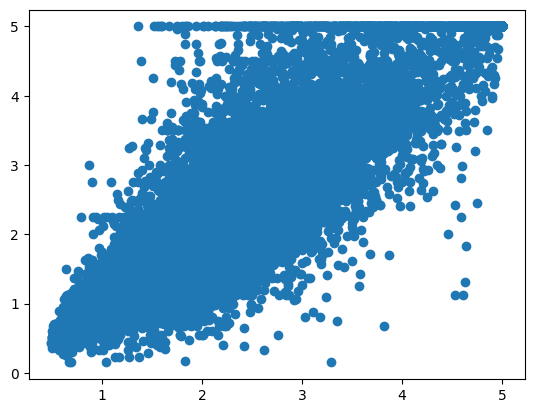

In [ ]:
prediction = model.predict(X)

plt.scatter(prediction, y)

#Preprossesing Practice

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv("/content/sample_data/drawndata1.csv")

In [ ]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [ ]:
X = df[['x','y']].values
y = df['z'] == 'a'

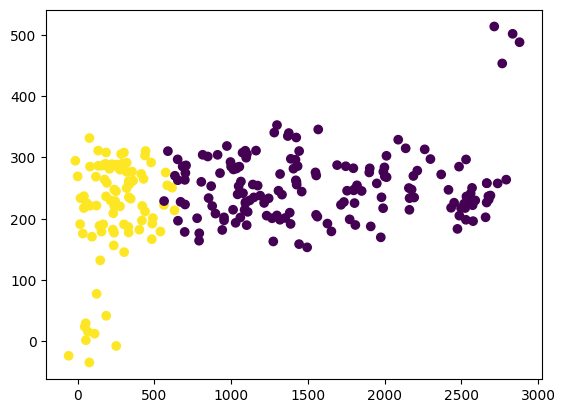

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

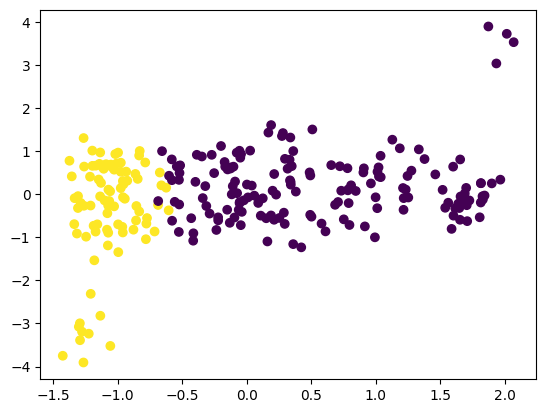

In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(X)

plt.scatter(X_new[:,0], X_new[:,1], c=y)

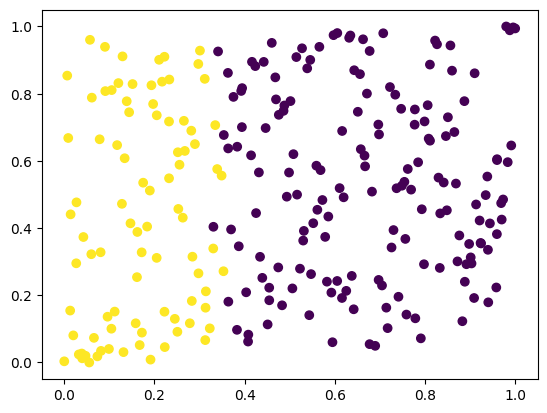

In [17]:
# quantile scaling

from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

Text(0.5, 1.0, 'Quantile Scaling')

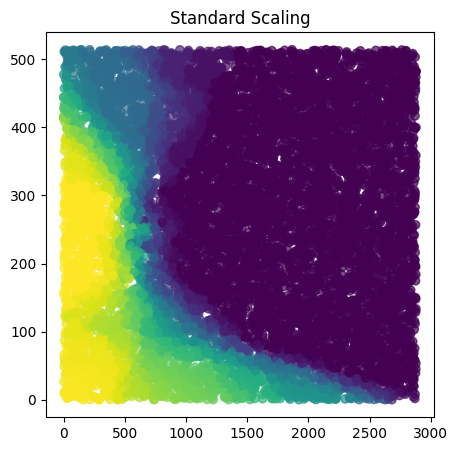

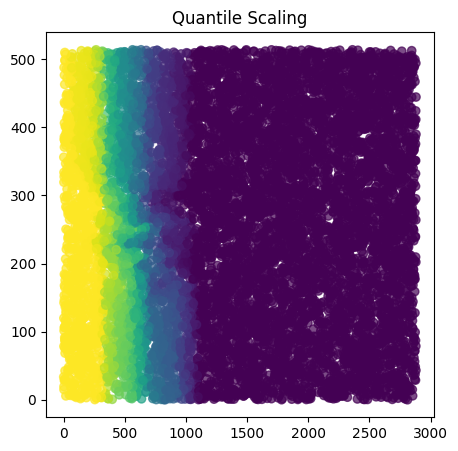

In [27]:
from sklearn.neighbors import KNeighborsClassifier

def plot_output(scaler):
  pipe = Pipeline([
      ("scale", scaler),
      ("model", KNeighborsClassifier(n_neighbors=20, weights="distance"))
  ])

  pred = pipe.fit(X, y).predict(X)

  plt.figure(figsize=(5,5))
  X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (10000, 1)),
        np.random.uniform(0, X[:, 1].max(), (10000, 1))
    ], axis=1)
  y_proba = pipe.predict_proba(X_new)
  plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)


plot_output(scaler=StandardScaler())
plt.title("Standard Scaling")

plot_output(QuantileTransformer(n_quantiles=100))
plt.title("Quantile Scaling")

#Sample Data #2

####Creating non-linear features from linear features in preprossesing to help Logistic Regression Model

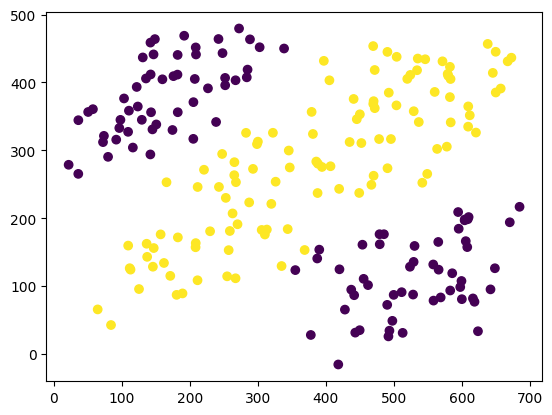

In [30]:
df = pd.read_csv("/content/sample_data/drawndata2.csv")

X = df[['x','y']].values
y = df['z'] == 'a'

plt.scatter(X[:,0], X[:,1], c=y)

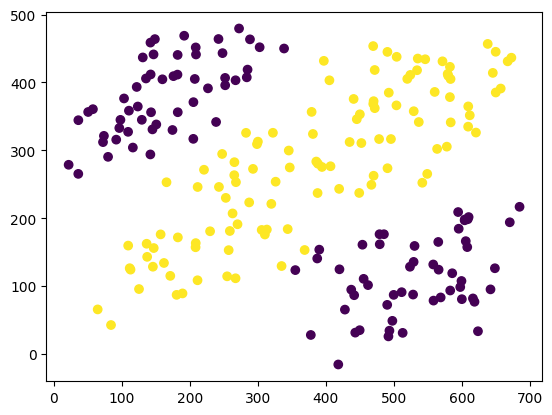

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    # uses features like a^2, a*b and b^2 from linear features a and b
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

prediction = pipe.fit(X,y).predict(X)

plt.scatter(X[:,0], X[:,1], c=prediction)

#Text data to numerical data



In [36]:
arr = np.array(["low", "low", "high", "medium", "medium"]).reshape(-1,1)

arr

array([['low'],
       ['low'],
       ['high'],
       ['medium'],
       ['medium']], dtype='<U6')

In [40]:
from sklearn.preprocessing import OneHotEncoder

# takes in an array of text and output numeric values
enc = OneHotEncoder(sparse_output=False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])